In [1]:

import cv2
from pytorchyolo import detect, models
import matplotlib.pyplot as plt
# Load the YOLO model
model = models.load_model(
  "./config/yolov3-custom.cfg", 
  "./checkpoints/yolov3_ckpt_300.pth")
import glob
from Classification.Heme_classifer import DeepHeme
import pandas as pd
from PIL import Image

/home/aa-ssun2-cmp/anaconda3/envs/heme_seg/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


./config/yolov3-custom.cfg
./config/yolov3-custom.cfg
did you get activated?
length of model list
107


In [9]:
import numpy as np

In [2]:
def RGB_hist(img = None):


    # list to select colors of each channel line
    colors = ("red", "green", "blue")

    # create the histogram plot, with three lines, one for
    # each color
    plt.figure()
    plt.xlim([0, 256])
    for (channel_id, color) in enumerate(colors):
        # use your circular mask to apply the histogram
        # operation to the 7th well of the first row
        histogram, bin_edges = np.histogram(
            img[:, :, channel_id], bins=256, range=(0, 256)
        )

        plt.plot(histogram, color=color)

    plt.xlabel("color value")
    plt.ylabel("pixel count")

In [4]:
image_dirs = glob.glob('../../Hemo_Region/WSI/slide279/*.tif')
len(image_dirs)

1416

In [5]:
x = image_dirs[0].split('/x')[-1].split('y')[0]
y = image_dirs[0].split('y')[-1].split('.tif')[0]
int(y)

13

In [10]:
image_lists = []
num_cell_lists = []
x_lists = []
y_lists = []
RGB_diff = []
for _img_dir in image_dirs:
    image = cv2.imread(_img_dir)
    if (image.shape[0] == 1000) and (image.shape[1] == 1000):
        
        x = int(_img_dir.split('/x')[-1].split('y')[0])
        y = int(_img_dir.split('y')[-1].split('.tif')[0])
        
        # Convert OpenCV bgr to rgb
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Runs the YOLO model on the image 
        boxes = detect.detect_image(model, image, conf_thres=0.3, nms_thres=0.1)
        num_cells = boxes.shape[0]
        x_lists.append(x)
        y_lists.append(y)
        num_cell_lists.append(num_cells)
        image_lists.append(_img_dir)
        
        
        diff = np.mean(np.array(image)[:,:,2]) - (np.mean(np.array(image)[:,:,0]) + np.mean(np.array(image)[:,:,1]))/2
        RGB_diff.append(diff)
    else:
        continue

In [11]:
df = pd.DataFrame({})
df['image_dirs'] = image_lists
df['x'] = x_lists
df['y'] = y_lists
df['num'] = num_cell_lists
df['RGB_diff'] = RGB_diff

(array([971., 175.,  76.,  43.,  24.,  15.,  12.,  13.,   2.,   3.]),
 array([  0. ,  10.8,  21.6,  32.4,  43.2,  54. ,  64.8,  75.6,  86.4,
         97.2, 108. ]),
 <BarContainer object of 10 artists>)

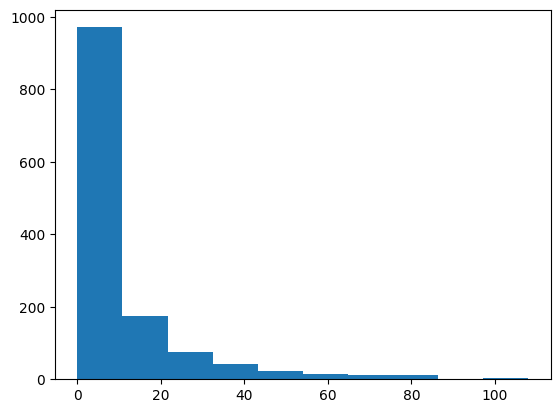

In [18]:
plt.hist(df['num'])

In [27]:
df[df['num']<20]

,image_dirs,x,y,num,RGB_diff
1,../../Hemo_Region/WSI/slide279/x45y21.tif,45,21,2,0.971862
2,../../Hemo_Region/WSI/slide279/x40y3.tif,40,3,1,2.507394
3,../../Hemo_Region/WSI/slide279/x27y12.tif,27,12,3,16.377695
4,../../Hemo_Region/WSI/slide279/x16y10.tif,16,10,2,13.906206
5,../../Hemo_Region/WSI/slide279/x15y5.tif,15,5,0,0.948921
...,...,...,...,...,...
1329,../../Hemo_Region/WSI/slide279/x3y3.tif,3,3,6,6.647681
1330,../../Hemo_Region/WSI/slide279/x10y6.tif,10,6,3,7.333901
1331,../../Hemo_Region/WSI/slide279/x50y22.tif,50,22,1,2.561911
1332,../../Hemo_Region/WSI/slide279/x43y0.tif,43,0,4,3.613685


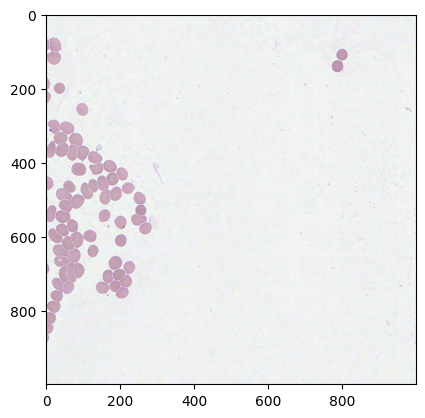

In [23]:
img = Image.open('../../Hemo_Region/WSI/slide279/x15y5.tif')
plt.imshow(img)

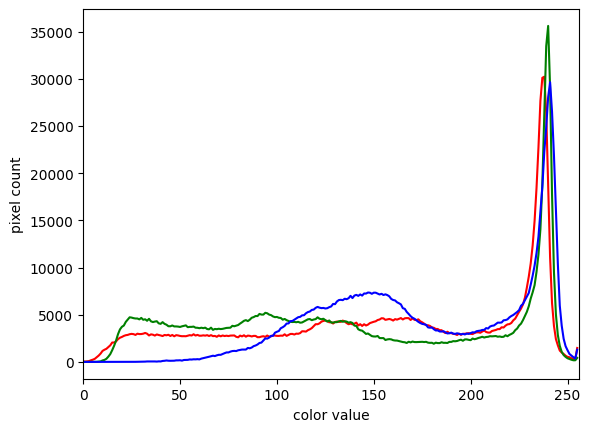

In [83]:
RGB_hist(img=np.array(img))

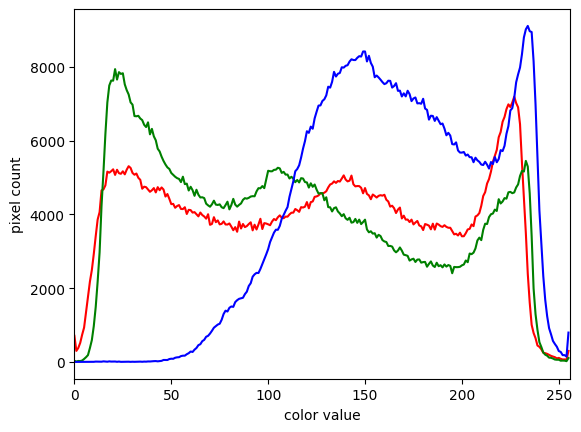

In [14]:
RGB_hist(img=np.array(img))

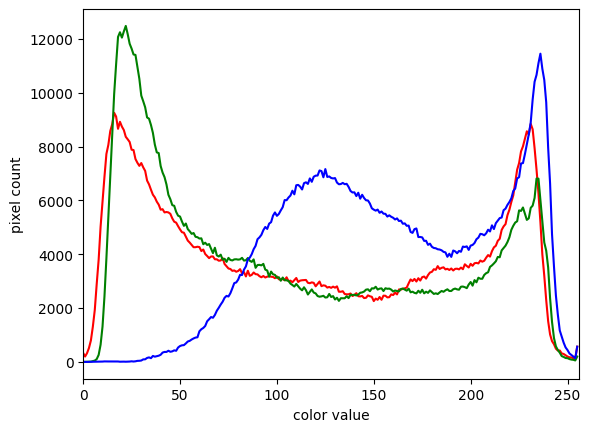

In [84]:
RGB_hist(img = np.array(img2))

In [92]:
cols = ['R','G','B']
for i in range(3):
    print(cols[i])
    print(np.mean(np.array(img)[:,:,i]))
    
    


R
156.753443
G
143.448944
B
179.168027


In [93]:
cols = ['R','G','B']
for i in range(3):
    print(cols[i])
    print(np.mean(np.array(img2)[:,:,i]))

R
115.296539
G
106.515057
B
160.288566


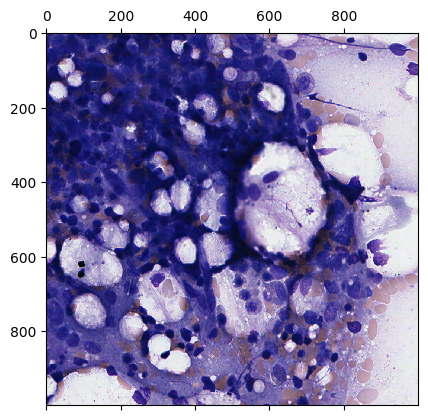

In [78]:
plt.matshow(img2)

(array([  1400.,   8453.,  31569.,  89479., 140446., 162433., 100426.,
         71872., 116450., 277472.]),
 array([ 24. ,  47.1,  70.2,  93.3, 116.4, 139.5, 162.6, 185.7, 208.8,
        231.9, 255. ]),
 <BarContainer object of 10 artists>)

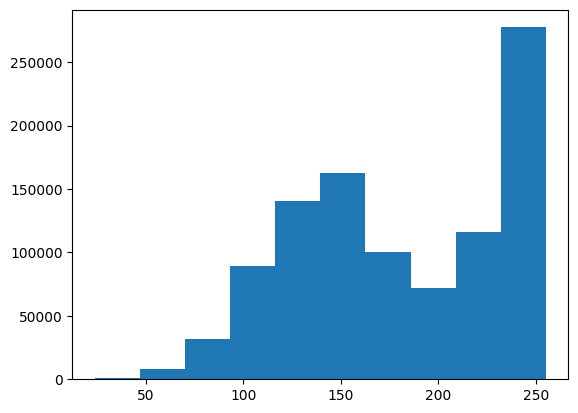

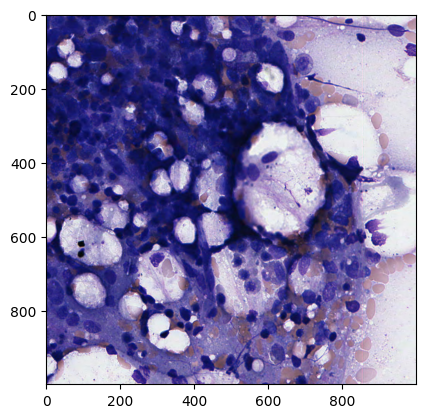

In [68]:
img2 = Image.open('../../Hemo_Region/WSI/slide279/x15y9.tif')
plt.imshow(img2)

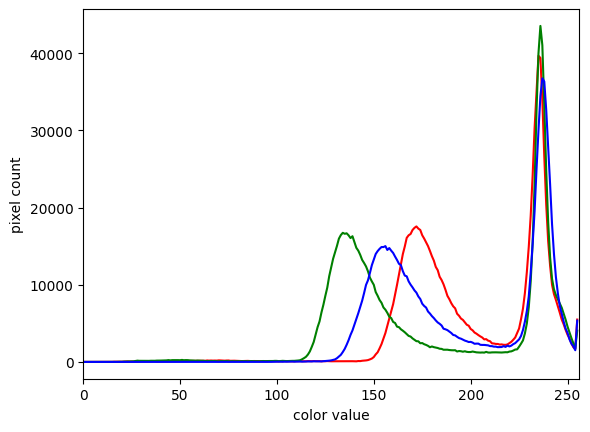